![](images/ml_banner.jpg)

## Part 2: Regression

* Simple Linear Regression.
* Multiple Linear Regression.
* Polynomial Regression.
* Support Vector Regression SVR.
* Decision Tree Regression.
* Random Forest Regression.
* Evaluating Regression Models Performance.

### <span style="color:blue">Simple Linear Regression</span>

Getting the course datasets from [here](https://github.com/johnmaged/Learning/tree/master/ML_python/datasets)

If you open the dataset SalaryData.csv, it will be like the below figure.
![alt text](images/salaryData.csv1.jpg "SalaryData.csv")

Notes about the above data:

1. Contains 2 columns.
2. Has 30 observations.
3. *YearsExperience* is **Independent Variables** while *Salary* is **Dependent Variable**

Now, we need to know what is the correlation between these two variables so we will build a Simple Linear Regression Model.

### <span style="color:blue">Simple Linear Regression Intuition</span>

#### STEP 1

![](images/SimpleLinearReg1.jpg "Simple Linear Regression - Step 1")


##### Plotting an example of Simple Linear Regression will be as below:


![](images/SimpleLinearReg2.jpg "Simple Linear Regression - Step 2")

#### STEP 2

![](images/SimpleLinearReg3.jpg "Simple Linear Regression - Step 3")


### <span style="color:blue"> Simple Linear Regression in Python</span>
#### STEP 1

In [66]:
# Importing the libraries
import numpy as np                  
import matplotlib.pyplot as plt     
import pandas as pd

# Loading the dataset
dataset = pd.read_csv('datasets\\Salary_Data.csv')

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# We will not need to do feature scaling here as the model will handle it automatically.

#### STEP 2

In [67]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #the model now is learning!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### STEP 3

In [68]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

#### STEP 4

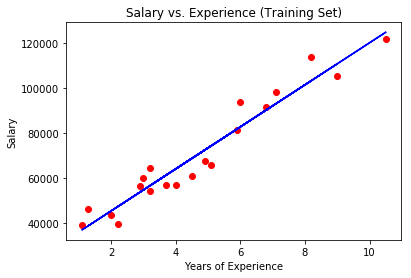

In [69]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary vs. Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

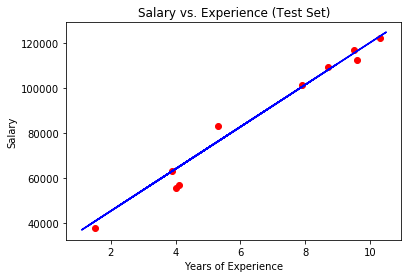

In [70]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary vs. Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Multiple Linear Regression.

Getting the course datasets from [here](http://www.superdatascience.com/machine-learning)

If you open the dataset 50_Startups.csv, it will be like the below figure.
![alt text](images/50_Startups.jpg "50_Startups.csv")

Notes about the above data:

1. Contains 5 columns.
2. Has 50 observations.
3. *R&D Spend*, *Administration*, *Marketing Spend*, and *State* are **Independent Variables** while *Profit* is **Dependent Variable**


### <span style="color:blue"> Multiple Linear Regression Intuition</span>
##### STEP 1

![](images/MultipleLinearRegression1.jpg "Multiple Linear Regression - Step 1")

##### STEP 2

**Assumptions of a Linear Regression**
1. Linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of errors
5. Lack of multicollinearity

##### STEP 3

![](images/MultipleLinearRegression2.jpg "Multiple Linear Regression - Step 3")

That is a categorical data! So we have to use **Dummy Variable** as we saw before.

![](images/MultipleLinearRegression3.jpg)

Then

![](images/MultipleLinearRegression4.jpg)

So

![](images/MultipleLinearRegression5.jpg)

##### STEP 4

What is **Dummy Variable Trap**?

![](images/MultipleLinearRegression6.jpg)

What will be happened if we have two dummy variables at the same time?
Simply, you are duplicating a variable as show below.

![](images/MultipleLinearRegression7.jpg)

So, always omit ONE dummy variable!

![](images/MultipleLinearRegression8.jpg)


##### STEP 5

Now, remember that good days when we had just one independent variable! In our current situation, we will have many!

![](images/MultipleLinearRegression9a.jpg)

We have to filter them and use the most effective ones because:

* Garbage **IN** = Garbage **OUT**
* **You have to understand everything about your independent variables** - their Math, explain them to your boss or your team!

So, we need to keep ONLY the most important ones for building a model and we have 5 methods to do so:

1. All-in.
2. Backward Elimination.
3. Forward Selection.
4. Bidirectional Elimination.
5. Score Comparison.

Sometimes, methods number 2,3, and 4 is called **Stepwise Regression** as their algorithm is a Step-by-Step clear shape.

Let's start to know what are they talking about.

###### All-in

![](images/MultipleLinearRegression10.jpg)

###### Backward Elimination

![](images/MultipleLinearRegression11.jpg)

###### Forward Selection

![](images/MultipleLinearRegression12.jpg)

###### Bidirectional Elimination

![](images/MultipleLinearRegression13.jpg)

###### Score Comparison

![](images/MultipleLinearRegression14.jpg)

And we will implement here the **Backward Elimination** using Python

### <span style="color:blue">Multiple Linear Regression in Python</span>
#### STEP 1

In [58]:
# Importing the libraries
import numpy as np                  
import matplotlib.pyplot as plt     
import pandas as pd

# Loading the dataset
dataset = pd.read_csv('datasets\\50_Startups.csv')

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features=[3]) # 0 here is for the first column.
X = onehotencoder.fit_transform(X).toarray()
# This creates 3 dummy variables, one for each state.
# but we need to avoid dummy variable trap problem!
X = X[:, 1:] # This will remove the left most column.
# Note: this is handled in most algorithms but some of them has no handling so sometimes
# we do that manually as above


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# We will not need to do feature scaling here as the model will handle it automatically.

##### STEP 2

In [59]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #the model now is learning!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### STEP 3

In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

##### STEP 4

We will not to plot it because we have 5 independent variables!

### <span style="color:blue">Backward Elimination with Python</span>

Now, we need to know which are the most important independent variables to be included in our model.

##### STEP 1

In [19]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
# We need to add a column of 1's to the matrix of features X to
# be equivalent to b0 in the multiple linear regression formula.
# X = np.append(arr = X, values = np.ones((50,1)).astype(int), axis = 1)
# ones((50,1)) function to add a matrix (like a vector) of 50x1
# axis = 1 here means column level while axis = 0 means rows level.
# if we applied the sentence on the 5th line, we will append the column
# to the right not on the left, so we will do a trick to add them as the
# first column by reversing their places in arr and values.
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

##### STEP 2

In [20]:
# Now, we will handle the Backward Elimination using X_opt
X_opt = X[:,[0,1,2,3,4,5]] 
# X_opt initialization by including all independent variables.

In [21]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # A simple Ordinary least squares model

##### STEP 3

In [22]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.34e-27
Time:                        13:55:18   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000      3.62e+04   6.4e+04
x1           198.7888   3371.007      0.059      0.953     -6595.030  6992.607
x2           -41.8870   3256.039     -0.013      0.990     -6604.003  6520.229
x3             0.8060      0.046     17.369      0.000         0.712     0.900
x4            -0.0270      0.052     -0.517      0.608        -0.132     0.078
x5             0.0270      0.017      1.574      0.123        -0.008     0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we are! the above tables are the most important in our algorithm.
<br>And the most one is the one in the middle with the **column P>|t|**

- constant: b0
- x1 and x2: Dummy Variables for State. 
- x3: R&D Spend.
- x4: Administration.
- x5: Marketing Spend.

Now, we have to find the **HIGHEST P-Value** which is x2 (one of the dummy variables) in this case.

##### STEP 4

In [23]:
# Removing the independent variable with the highest P-Value
X_opt = X[:,[0,1,3,4,5]] 

##### STEP 5

In [24]:
# Fitting the model without the removed variable.
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           8.49e-29
Time:                        13:55:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000      3.67e+04  6.35e+04
x1           220.1585   2900.536      0.076      0.940     -5621.821  6062.138
x2             0.8060      0.046     17.606      0.000         0.714     0.898
x3            -0.0270      0.052     -0.523      0.604        -0.131     0.077
x4             0.0270      0.017      1.592      0.118        -0.007     0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again! the above tables are the most important in our algorithm.
<br>And the most one is the one in the middle with the **column P>|t|**

- constant: b0
- x1: one of the Dummy Variables for State. 
- x2: R&D Spend.
- x3: Administration.
- x4: Marketing Spend.

Now, we have to find the **HIGHEST P-Value** which is x1 (one of the dummy variables) in this case
<br>so we will repeat again the above steps 4 and 5 to reach the best variables.

In [25]:
# Removing the independent variable with the highest P-Value
X_opt = X[:,[0,3,4,5]] 
# Fitting the model without the removed variable.
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           4.53e-30
Time:                        13:55:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000      3.69e+04  6.34e+04
x1             0.8057      0.045     17.846      0.000         0.715     0.897
x2            -0.0268      0.051     -0.526      0.602        -0.130     0.076
x3             0.0272      0.016      1.655      0.105        -0.006     0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again! the above tables are the most important in our algorithm.
<br>And the most one is the one in the middle with the **column P>|t|**

- constant: b0
- x1: R&D Spend.
- x2: Administration.
- x3: Marketing Spend.

Now, we have to find the **HIGHEST P-Value** which is x2 (Administration) in this case
<br>so we will repeat again the above steps 4 and 5 to reach the best variables.

In [26]:
# Removing the independent variable with the highest P-Value
X_opt = X[:,[0,3,5]] 
# Fitting the model without the removed variable.
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           2.16e-31
Time:                        13:55:24   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000      4.16e+04  5.24e+04
x1             0.7966      0.041     19.266      0.000         0.713     0.880
x2             0.0299      0.016      1.927      0.060        -0.001     0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again! the above tables are the most important in our algorithm.
<br>And the most one is the one in the middle with the **column P>|t|**

- constant: b0
- x1: R&D Spend.
- x2: Marketing Spend.

Now, we have to find the **HIGHEST P-Value** which is x2 (Marketing Spend) in this case
<br>so we will repeat again the above steps 4 and 5 to reach the best variables.
<br>we still have one over the (SL) significance level (0.05)
<br>
<br>
Note: The P-Value is slightly higher than or Significance Level (0.060 > 0.05)
<br> We can modify our SL to be more than 0.05 or strictly apply the rule with
<br> our current SL value and proceed removing x2 variable.
<br> In our course, we will use an additional matrix to help us decide what to do
<br> if we have that situation for better results.

In [27]:
# Removing the independent variable with the highest P-Value
X_opt = X[:,[0,3]] 
# Fitting the model without the removed variable.
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           3.50e-32
Time:                        13:55:25   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000      4.39e+04  5.41e+04
x1             0.8543      0.029     29.151      0.000         0.795     0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we are! The most important independent variable is **R&D Spend** only!

If you are also interested in some automatic implementations of Backward Elimination in Python, <br>please find two of them below:
###### Backward Elimination with p-values only:

```
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)
```

##### Backward Elimination with p-values and Adjusted R Squared:

```
import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)
```

### Polynomial Regression.

Getting the course datasets from [here](http://www.superdatascience.com/machine-learning)

If you open the dataset Position_Salaries.csv, it will be like the below figure.
![alt text](images/Position_Salaries.jpg "Position_Salaries.csv")

Notes about the above data:

1. Contains 3 columns.
2. Has 10 observations.
3. *Level* is **Independent Variables** while *Salary* is **Dependent Variable**

<br>**Note**: we did not include the first column **Position** because it is encoded in the second column **Level** so no need to consider **Position** in our analysis as we have **Level** instead.

### <span style="color:blue">Polynomial Regression Intuition</span>

![](images/Polynomial_regression.jpg "Polynomial Regression")

Note that it uses one variable with difference powers. And if we plot its data, it will be
<br>like the graph below:

![](images/Polynomial_regression2.jpg "Polynomial Regression")

But why this is considered a linear regression while we have different powers?!
<br>**Because we are talking about the coefficients here not the X values.**

### <span style="color:blue">Polynomial Linear Regression in Python</span>
##### STEP 1

In [61]:
# Importing the libraries
import numpy as np                  
import matplotlib.pyplot as plt     
import pandas as pd

# Loading the dataset
dataset = pd.read_csv('datasets\\Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  
y = dataset.iloc[:, 2].values

# always it is recommended to split the data into training and testing set but
# in this case, there is no need to split the data as we have just 10 observations!

# also we will not need to do feature scaling here as the model will handle it automatically.

##### STEP 2

Here we will build 2 models to compare the results got from the Simple Linear Regression and the Polynomial Linear Regression.

In [62]:
# Fitting Simple Linear Regression to the Dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) #the model now is learning!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# Fitting Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
# degree = 2 means to have b0 + b1x1 + b2(x1*x1) x1 squared
# degree = n means we will add new columns x, x squared, x to the power 3, .., x to the power n

# poly_reg is a tool that will transform the matrix of features X
# into a new matrix of features X_poly by adding the additional polynomial terms into the matrix X 
X_poly= poly_reg.fit_transform(X)

In [64]:
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

The new X_poly has 3 columns,
- column of ones, added automatically for the constant b0
- second column is the original **Level** column.
- third column is added by the poly_reg with degree 2 so it has the values of **Level** but squared.

In [32]:
# Final step in building the polynomial model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### STEP 3

We will visualise the results of the two models above.

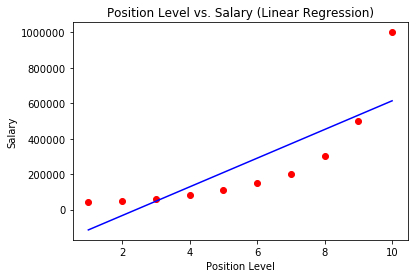

In [33]:
# Visualising the Simple Linear Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X),color = 'blue')
plt.title('Position Level vs. Salary (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

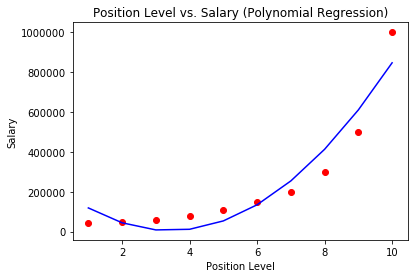

In [34]:
# Visualising the Polynomial Linear Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')
# Note that we used poly_reg.fit_transform(X) above to maintain the shape of the matrix
# that lin_reg_2 can understand - see step 2 above.
plt.title('Position Level vs. Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Polynomial Regression model is much better than Simple Linear Regression in this case. But can we enhance our Polynomial model to get better results?
<br>Yes, we can modify the degree of the polynomial model as follow:
<br>
<br> Setting the **degree = 3**

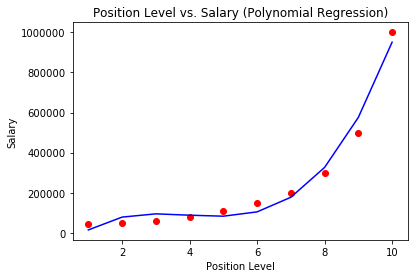

In [35]:
# Fitting Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly= poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Position Level vs. Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Wow! It is much better.
<br> Trying **degree = 4**

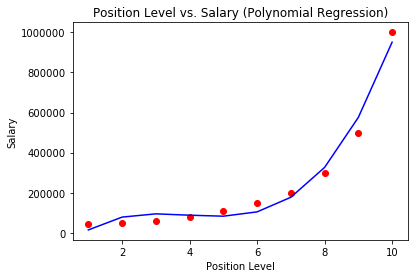

In [36]:
# Fitting Polynomial Regression to the Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly= poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Position Level vs. Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

We can enhance the plotting more by increasing the resolution as follows:

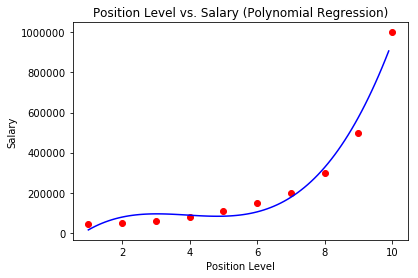

In [37]:
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color = 'blue')
plt.title('Position Level vs. Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Wow, much better resolution!

### Support Vector Regression
##### STEP 1

In [38]:
datasets\\# Importing the libraries
import numpy as np                  
import matplotlib.pyplot as plt     
import pandas as pd

# Loading the dataset
dataset = pd.read_csv('datasets\\Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  
y = dataset.iloc[:, 2].values

# always it is recommended to split the data into training and testing set but
# in this case, there is no need to split the data as we have just 10 observations!

# also we will not need to do feature scaling here as the model will handle it automatically.

##### STEP 2

In [39]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # This kernel is for Gaussian as we have non-linear data
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##### STEP 3

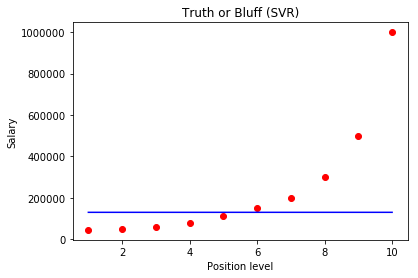

In [40]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

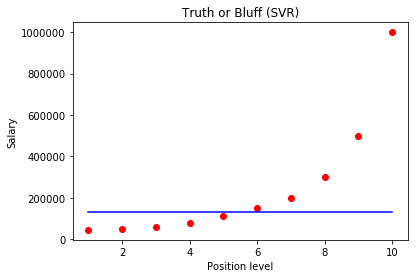

In [41]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

When looking in this visulisation, we will decide the SVR is the worest model for this data! But wait, this is not the case!
<br>The problem here that we need **Feature Scaling** and let us do everything again with apply Feature Scaling!

In [65]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('datasets\\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\jojo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\jojo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\jojo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

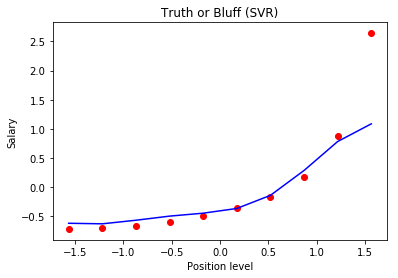

In [43]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

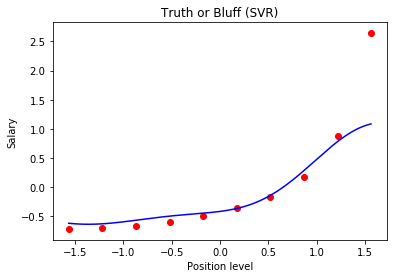

In [44]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Wow! Big difference!

Now, we have a new situation! If we want to predict the Salary for a new Position Level like the below line:
```
y_pred = regressor.predict(6.5)
```
Does this will work?
<br>The answer is **NO**
<br>We have to scale the new value as below:
```
y_pred = regressor.predict(sc_X.transform(6.5))
```
When we apply the line above after scaling, we will get an error!!
<br>*TypeError: Singleton array array(6.5) cannot be considered a valid collection.*
<br>This is because the **transform** function is expecting an array to be passed as a parameter so we will do the following:

In [45]:
regressor.predict(sc_X.transform(np.array([[6.5]])))

array([-0.27861589])

We need now to understand the resulting number! We could not do that without **inverse transform** as below:

In [46]:
sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

array([ 170370.0204065])

The result is amazing and very reasonable!

### Decision Tree Regression

### <span style="color:blue">Decision Tree Regression Intuition</span>

Did heard before about the term **CART**?
<br> **CART** stands for **C**lassification **A**nd **R**egression **T**rees
![](images/CART.jpg "CART")
<br>and for sure we will focus now on the **Regression Trees**

Consider the below situation having a scatter plot of two independent variables and unfortunately you cannot see the y vector as it will be 3-Dimensional in this case

![](images/two_IV_dt.jpg)

<br>So, forget about y for a while!
<br>If we apply the Decision Tree on this data, it will splits the data into segments as the below example:

![](images/two_IV_dt_splits.jpg)

<br>This is done through something is called **Information Entropy**. Now, let us build the above splits again through our Decision Tree.

![](images/two_IV_dt_building.jpg)

<br>Getting back to **y**, how we could predict a new value through that decision tree?
<br>I will told you very soon! but now, we are going to calculate the mean of **y** in each split and for example will be the below results:

![](images/two_IV_dt_splits_ymean.jpg)

<br>So, if the new data point is in a certain split, its predicted value will be the calculated mean for that split!

### <span style="color:blue">Decision Tree Regression in Python</span>
##### STEP 1

In [47]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('datasets\\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

##### STEP 2

In [48]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
# It has additional parameters but we will leave them to default values for now
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

##### STEP 3

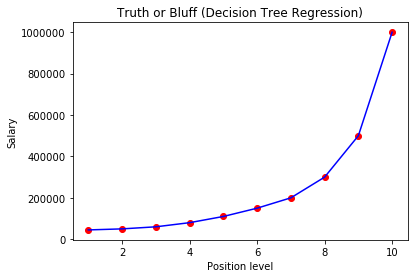

In [49]:
# Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Note that this is not the shape of the Decision Tree models at all. There is no problem but we has to use a higher resolution way to plot its results.

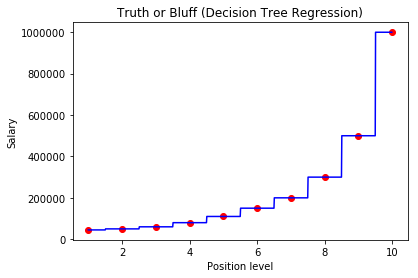

In [50]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Great!